# First Model with Scikit-Learn

We start first with building predictive models on pandas dataframes using only numerical features. 
In particular we will highlight:
* The sickit-learn API: `.fit(X, y)`, `.predict(X)`, `.score(X, y)`; and
* how to evaluate the generalization performance of a model with a train-test split.

We are going to use the same `adult_census.csv` data as before.

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Disable jedi autocompleter
%config Completer.use_jedi = False

In [7]:
# Load only numerical variables from the data
df = pd.read_csv("data/adult-census.csv", usecols=['age', 'capital-gain', 
                                                  'capital-loss', 'hours-per-week', 'class'])
df.head(5)

,age,capital-gain,capital-loss,hours-per-week,class
0,25,0,0,40,<=50K
1,38,0,0,50,<=50K
2,28,0,0,40,>50K
3,44,7688,0,40,>50K
4,18,0,0,30,<=50K


Our target, that we would like to predict is `class` and the remaining columns are used to train our predictive model.  

The first step is to separate columns to get on one side the target and on the other side the data.

In [13]:
target = df['class']
data = df.drop(columns=['class',])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [10]:
data.shape

(48842, 4)

## Fit a Model an Make Predictions

We will build a classification model using the "K-nearest neighbors" strategy. To predict the target of a new sample, a k-nearest neighbors takes into account its $k$ closest samples in the training set and predicts the majority target of these samples.

<div class="alert alert-block alert-warning">
<b>Caution:</b> <br>
We use a K-nearest neighbors here. However, be aware that it is seldom useful
in practice. We use it because it is an intuitive algorithm. In the next
notebook, we will introduce better models.</div>

The `fit` method is called to train the model from the input and target data.

In [11]:
# to display a nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# 1. we first declare the model using the classifier's constructor
model = KNeighborsClassifier()

# 2. Then we train the model using the training data and training targets
model.fit(data, target)

KNeighborsClassifier()

Learning can be represented as follows:

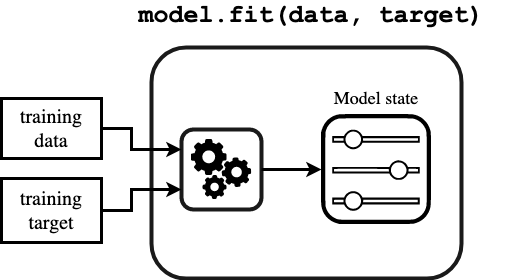

The method `fit` is composed of two elements:  

1. A learning algorithm,
2. Some model states.

The learning algorithm takes the training data and training target as input and sets the model states. These model states will be used later to either predict (for classifiers and regressors) or transform data (for transformers).

Let's use our model to make some prediction using the same dataset.

In [18]:
# 3. We predict the outcome of the testing data
target_predicted = model.predict(data)

We can illustrate the prediction mechanism as follows:

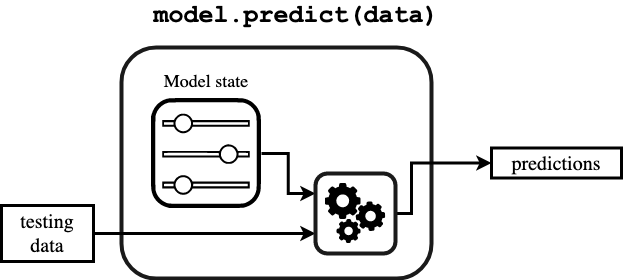

To predict, a model uses a prediction function that will use the input data together with the model states.  

Let's now have a look at the computed predictions.

In [19]:
# first five predicted targets
target[:5] == target_predicted[:5]

0     True
1     True
2    False
3     True
4     True
Name: class, dtype: bool

In [21]:
print(f"Number of correct prediction: "
      f"{(target == target_predicted).sum()} / {len(target)}")

Number of correct prediction: 39352 / 48842


To get a better assessment, we can compute the average success rate:

In [22]:
(target == target_predicted).mean()

0.8057000122845093

## Train-Test Data Split

<div class="alert alert-block alert-warning">
When building a machine learning model, it is important to evaluate the trained model on data that was not used to fit it. Generalization vs. memorization
</div>

The data used to fit a model is called training data, while the data used to assess a model is classed testing data